In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handle-outlier/placement.csv


In [2]:
import seaborn as sns
import matplotlib as plt

In [3]:
df= pd.read_csv('/kaggle/input/handle-outlier/placement.csv')

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [7]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='cgpa', ylabel='Density'>

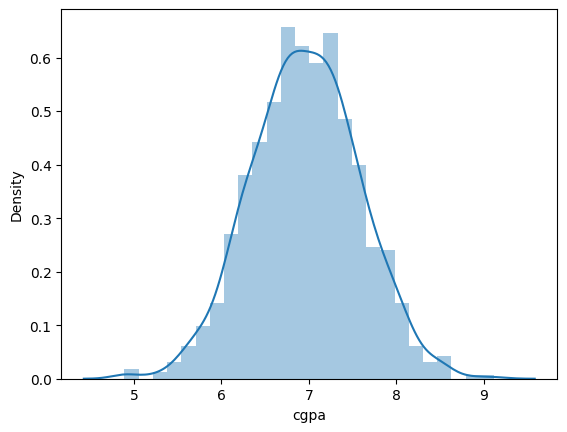

In [8]:
sns.distplot(df['cgpa'])

<Axes: xlabel='cgpa'>

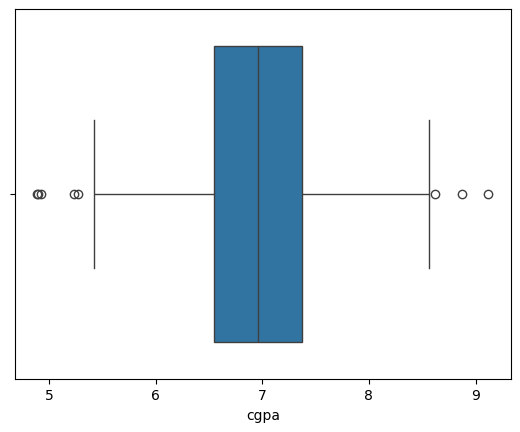

In [9]:
sns.boxplot(x= df['cgpa'])

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

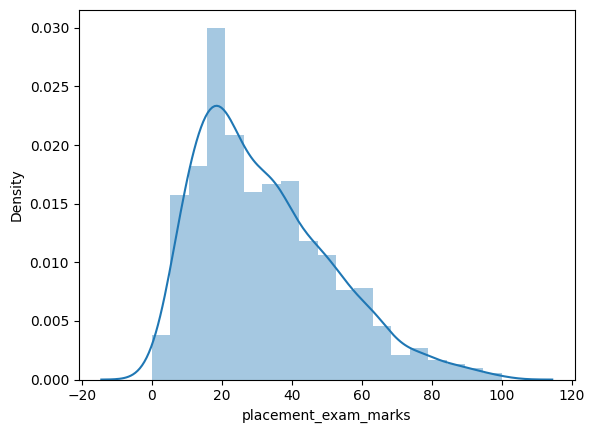

In [10]:
sns.distplot(df['placement_exam_marks'])

In [11]:
#handle outlier

num_col = df.select_dtypes(include='number').columns

for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df[col] = df[col].clip(lower, upper)  # capping here

<Axes: xlabel='placement_exam_marks'>

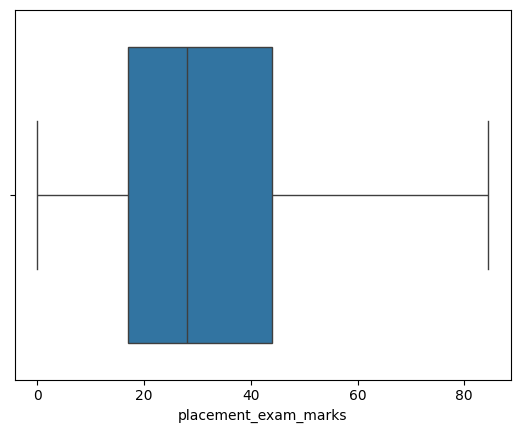

In [12]:
sns.boxplot(x= df['placement_exam_marks'])

<Axes: xlabel='cgpa', ylabel='Density'>

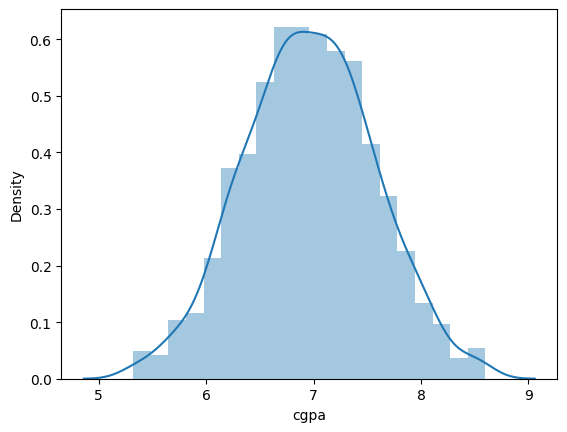

In [13]:
sns.distplot(df['cgpa'])